<a href="https://www.kaggle.com/code/pranavsatyal1/breast-cancer-ml-nn?scriptVersionId=98836796" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install mlxtend
!pip install ann_visualizer

ERROR: Could not find a version that satisfies the requirement ann_visualizer (from versions: none)
ERROR: No matching distribution found for ann_visualizer


## Using Logistics Regression,  DecisionTree, RandomForest, Naive Bayes, K-Means, and Neural Network (Keras and Sklearn MLPClassifier) to make models for breast cancer dataset

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.metrics import classification_report


from sklearn.cluster import KMeans


np.random.seed(42)

# To plot pretty figures

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn import preprocessing
from subprocess import check_output
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

# !pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


from keras.callbacks import EarlyStopping



In [5]:
# import io
# data = pd.read_csv(io.BytesIO(uploaded['bdata.csv']))

data= pd.read_csv(r"../input/breast-cancer/bdata.csv")

#### Data Preprocessing

In [14]:
print(data.shape)

(569, 23)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    fl

In [13]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  perimeter_se     area_se  smoothness_se  \
count     569.000000  ...    569.000000  569.000000     569.000000   
mean        0.181162  ...      2.866059   40.337079       0.007041   
std         0.027414  ...      2.021855   45.491006       0.003003   
min         0.106000  ...      0.757000    6.802000       0.001713   
25%         0.161900  ...      1.606000   17.850000       0.005169   
50%         0.179200  ...      2.287000   24.530000       0.006380   
75%         0.195700  ...      3.357000   45.190000       0.008146   
max         0.304000  ...     21.980000  542.200000       0.031130   

       compactness_se  concavity_se  concave points_se  symmetry_se  \
count      569.000000    569.000000         569.000000   569.000000   
mean         0.025478      0.031894           0.011796     0.020542   
std          0.017908      0.030186           0.006170     0.008266   
min          0.002252      0.000000           0.000000     0.007882   
25%          0.013080      0.015090           0.007638     0.015160   
50%          0.020450      0.025890           0.010930     0.018730   
75%          0.032450      0.042050           0.014710     0.023480   
max          0.135400      0.396000           0.052790     0.078950   

       fractal_dimension_se  radius_worst   diagnosis  
count            569.000000    569.000000  569.000000  
mean               0.003795     16.269190    0.372583  
std                0.002646      4.833242    0.483918  
min                0.000895      7.930000    0.000000  
25%                0.002248     13.010000    0.000000  
50%                0.003187     14.970000    0.000000  
75%                0.004558     18.790000    1.000000  
max                0.029840     36.040000    1.000000  

[8 rows x 23 columns]

In [16]:
data.isnull().sum()

id                        0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_se                 0
texture_se                0
perimeter_se              0
area_se                   0
smoothness_se             0
compactness_se            0
concavity_se              0
concave points_se         0
symmetry_se               0
fractal_dimension_se      0
radius_worst              0
diagnosis                 0
dtype: int64

## Visualizing data

#### Genereating Boxplot using whisker size =3

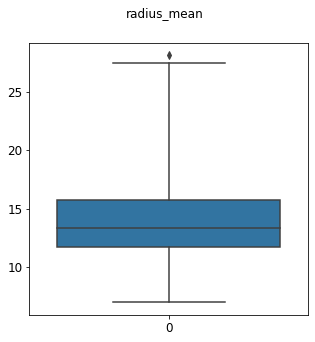

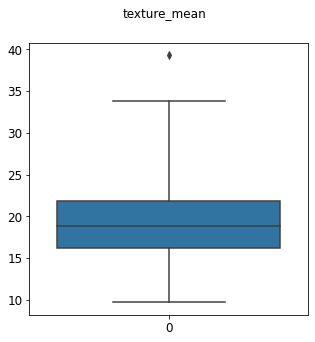

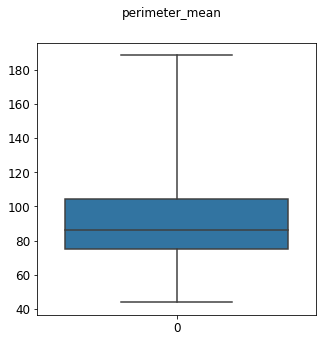

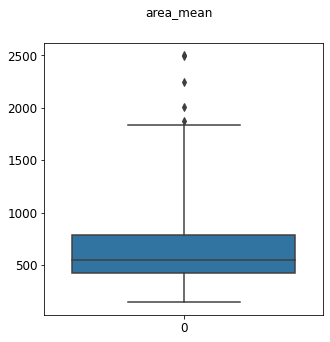

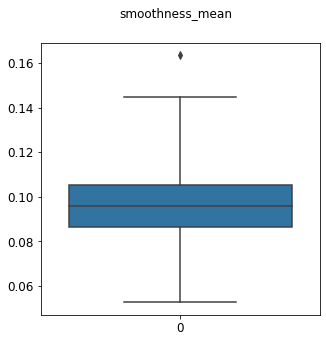

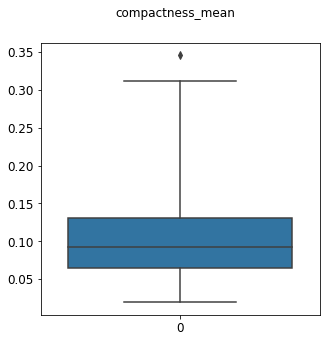

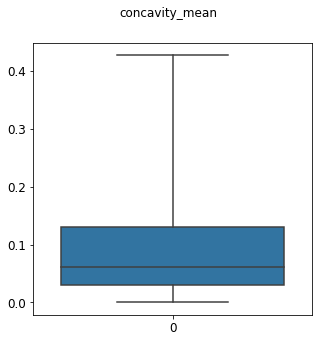

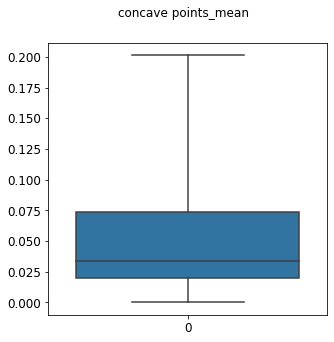

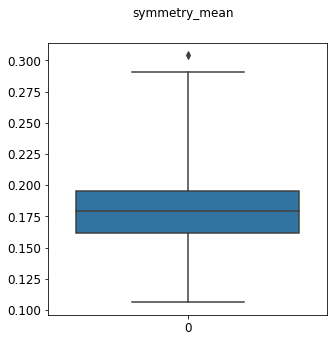

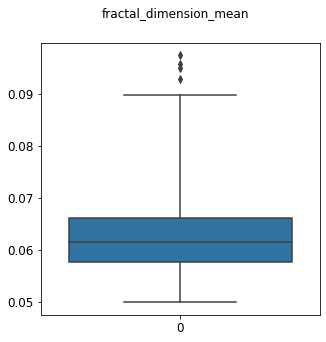

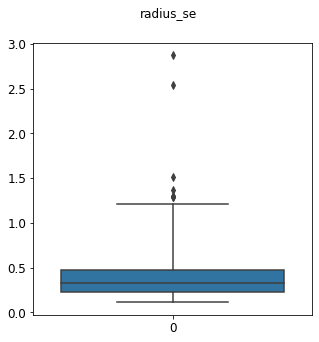

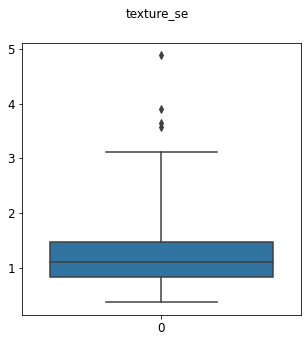

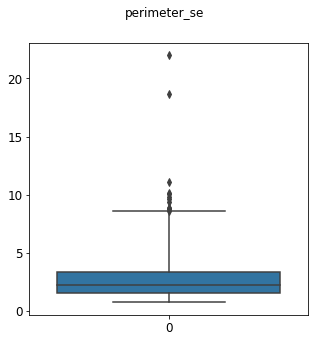

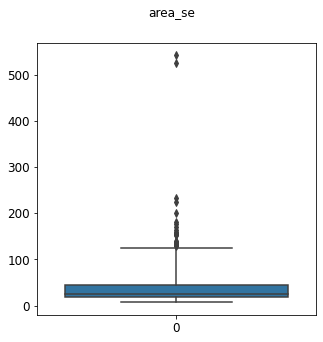

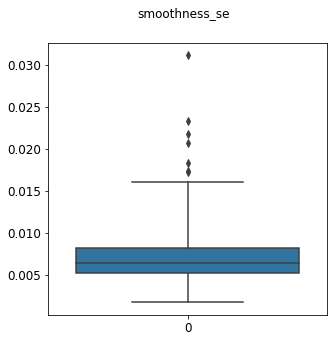

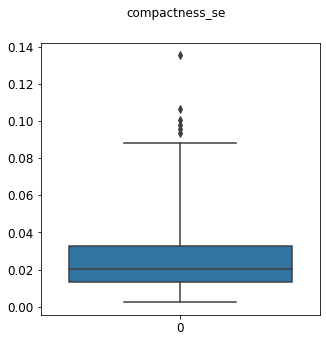

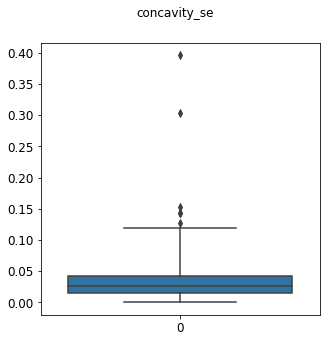

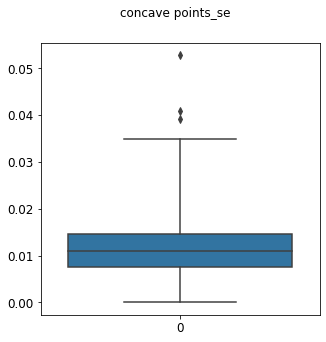

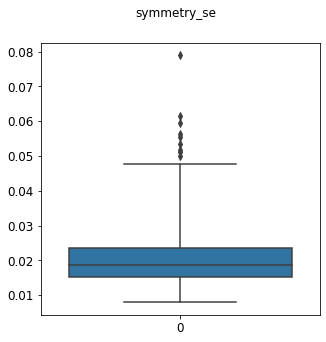

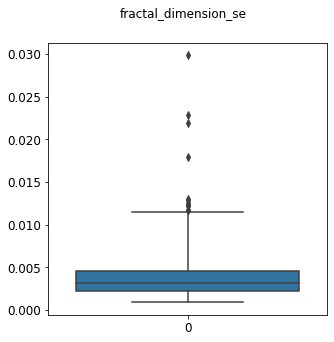

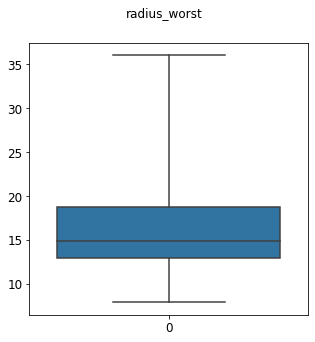

In [19]:
## Creating Boxplot
X= data.drop(["diagnosis","id"],axis=1)
_vars = X.columns

for i in _vars:
    fig, axes = plt.subplots(sharex=True, figsize=(5,5))
    fig.suptitle(f'{i}')
    sns.boxplot(data = data[i], whis=3.0)

#### Corrleation Heatmap using a mask.

Text(0.5, 1.0, 'Correlation Heatmap for all variables')

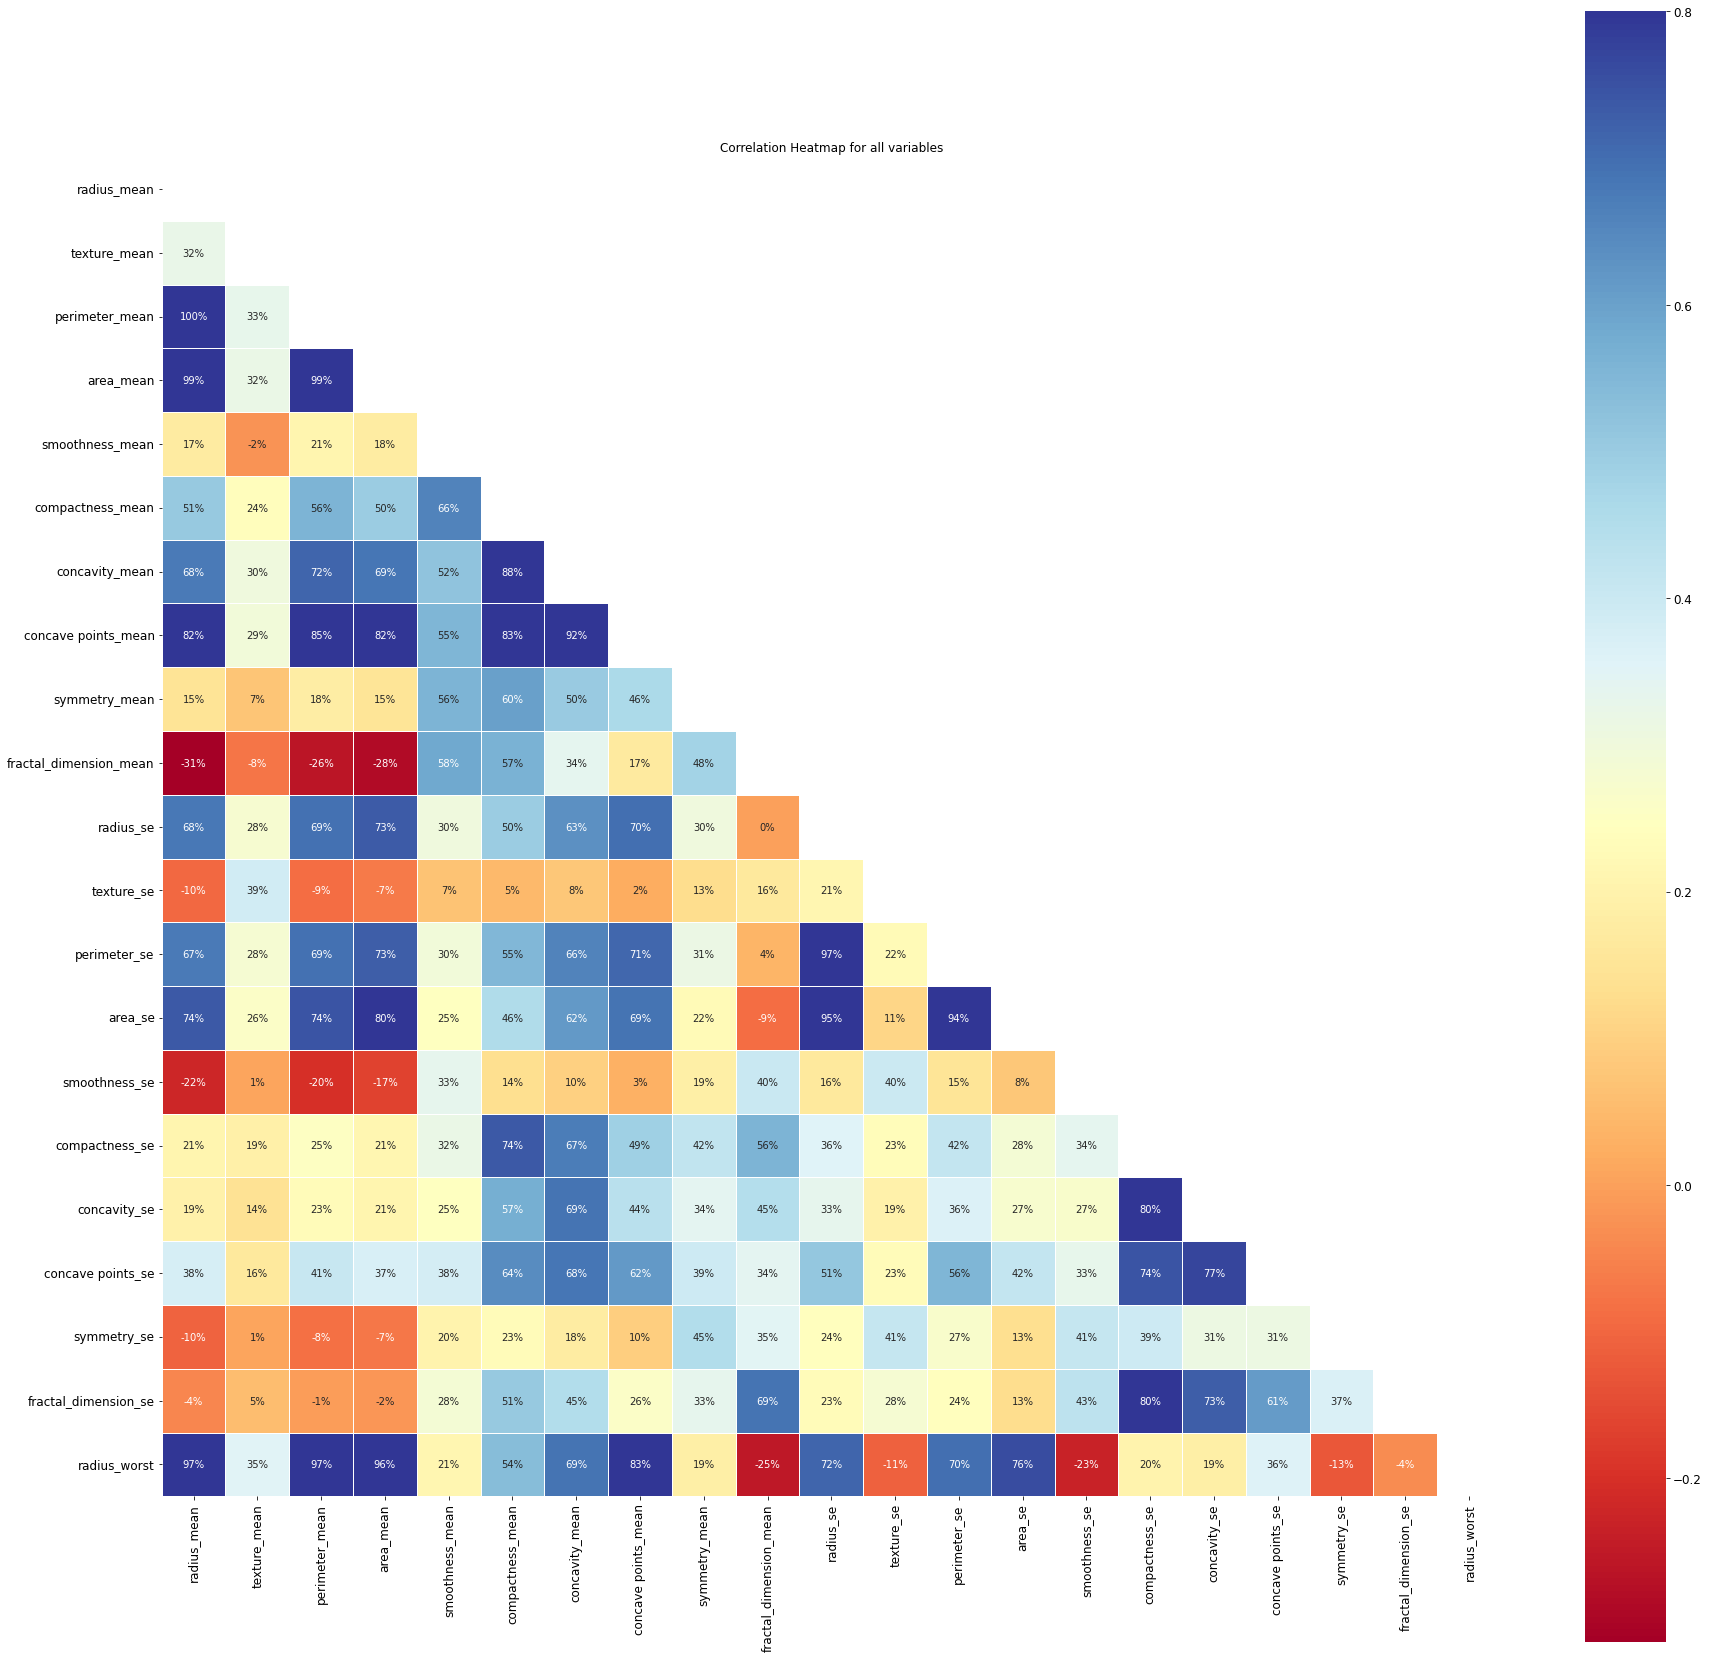

In [21]:
##creating a correleation heatmap
datacorr=X.corr()
## creating a mask to only see relationship between few variables

mask= np.triu(np.ones_like(datacorr, dtype=bool))

# set the figure size
plt.subplots(figsize=(30,30))

## creating heat map using a mask


sns.heatmap(datacorr, vmax=.8, square=True, mask = mask, annot=True, cmap='RdYlBu', linewidths=.9, fmt='.0%' )
plt.title('Correlation Heatmap for all variables')


## Pairplot

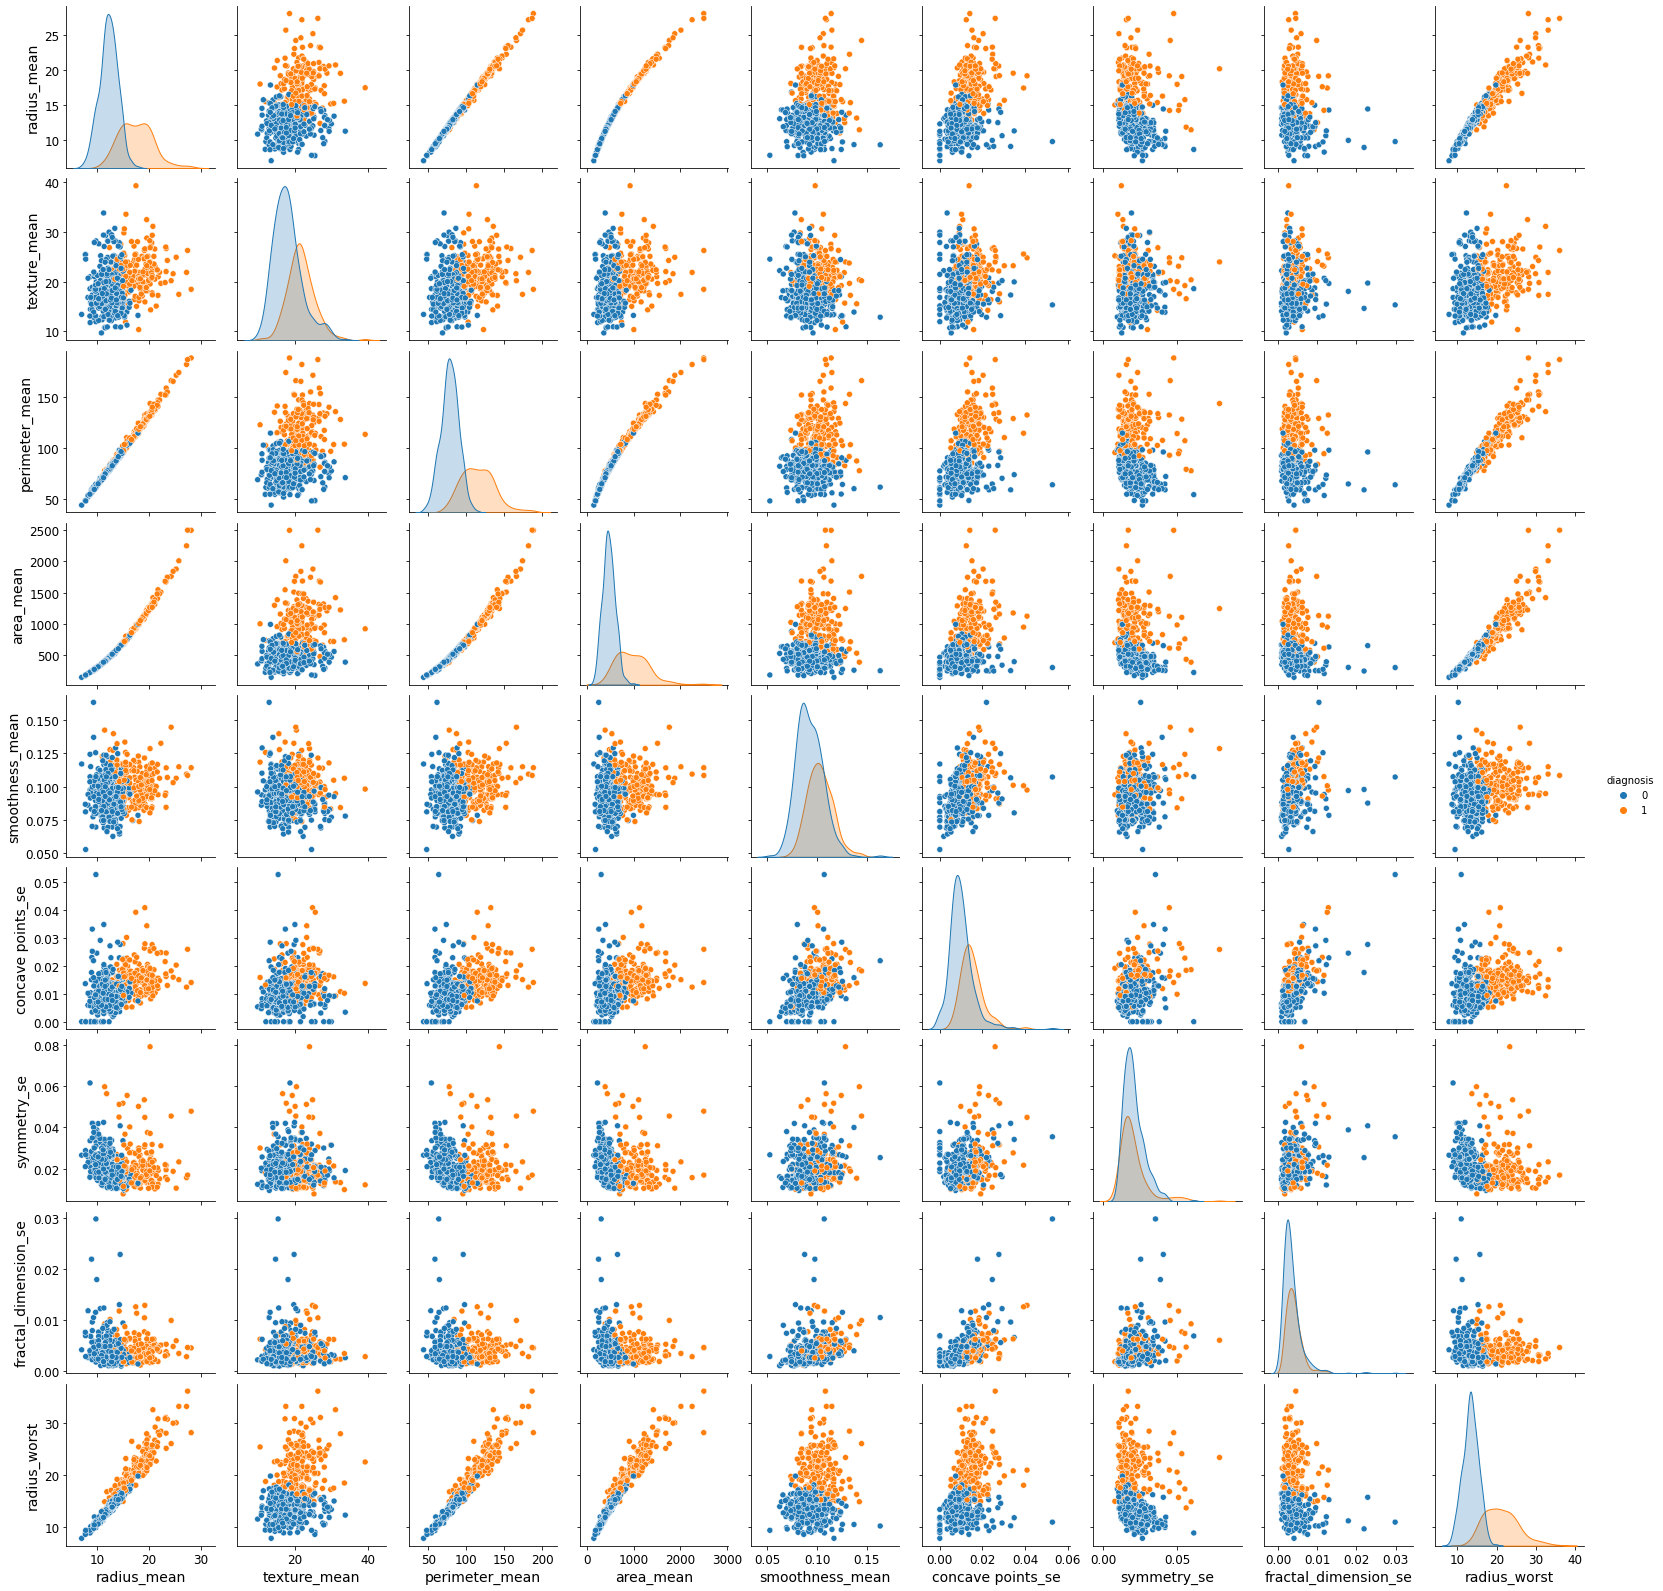

In [22]:
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst']);

In [23]:
### creating target_values column
data["target_values"]=data["diagnosis"]
data.loc[data.diagnosis == 1, "target_values"] = "malignant"
data.loc[data.diagnosis == 0, "target_values"] = "benign"

In [24]:
X= data.iloc[:, 1:22]
y=data.iloc[:, 22]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Creating function for Logistic Regression, Decision Tree, Randomforest and Naive Bayes Models

In [29]:
## Create a function for model
def models(X_train, Y_train):
    
    # first model is logistics 
    from sklearn.linear_model import LogisticRegression
    log= LogisticRegression(random_state=42)
    log.fit(X_train,Y_train)
    
    ## 2nd model decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree= DecisionTreeClassifier(criterion='entropy',random_state=42)
    tree.fit(X_train,Y_train)
    
    #3rd model random forest
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
    forest.fit(X_train,Y_train)
    
    ## 4th model Gaussian Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    clf.fit(X_train, Y_train)
    
    ## Print accuracy
    print('[0]Logistics Regression Training Accuracy:-',log.score(X_train,Y_train))
    print()
    print('[1]Decision Tree Classifier  Training Accuracy:-',tree.score(X_train,Y_train))
    print()
    print('[2]Random Forest Training Accuracy:-',forest.score(X_train,Y_train))
    print()
    print('[3]Gaussian Naive Bayesn Training Accuracy:-',clf.score(X_train,Y_train))
    
    return log,tree,forest,clf

#### Accuracy of Models

In [30]:
model=models(X_train,y_train)

[0]Logistics Regression Training Accuracy:- 0.967032967032967

[1]Decision Tree Classifier  Training Accuracy:- 1.0

[2]Random Forest Training Accuracy:- 0.9978021978021978

[3]Gaussian Naive Bayesn Training Accuracy:- 0.9208791208791208


#### Confusion Matrix

Model 0


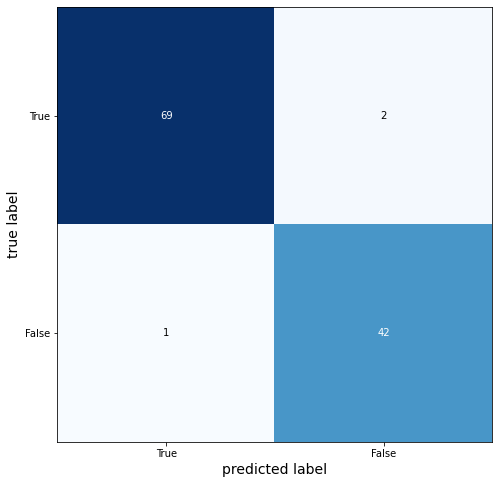


Classification Report for Model 0: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114




Model 1


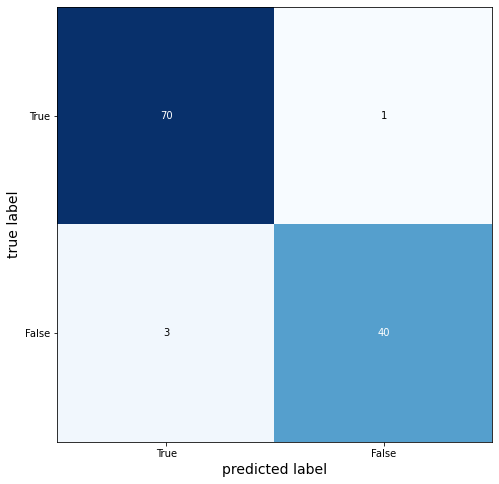


Classification Report for Model 1: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114




Model 2


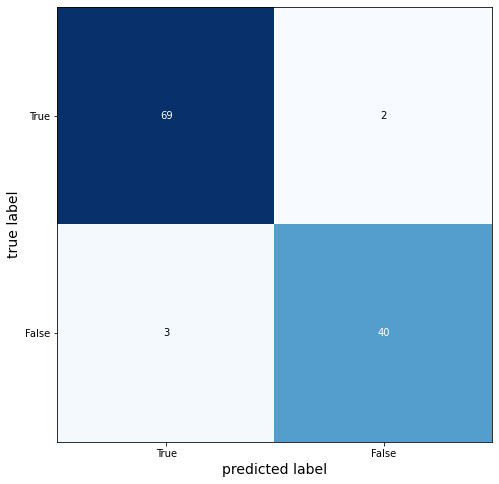


Classification Report for Model 2: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114




Model 3


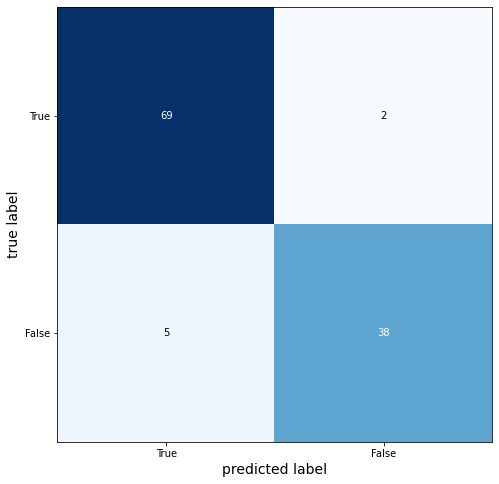


Classification Report for Model 3: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114






In [34]:
### Confusion Matrix on Testing Dataset


for i in range(len(model)):
    print("Model",i)
    cm = confusion_matrix(y_test, model[i].predict(X_test))
    fig, axes = plot_confusion_matrix(conf_mat=cm ,  figsize=(8,8))
    # plt.title('Confusion matrix on Training Set')
    plt.xticks(range(2), ['True','False'], fontsize=10)
    plt.yticks(range(2), ['True','False'], fontsize=10)
    plt.show()
    print()
    print(f"Classification Report for Model {i}: ")
    print(classification_report(y_test, model[i].predict(X_test)))
    print()
    print()
    print()

## ROC AUC Curve


In [36]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

ROC AUC Curve for Model: 0


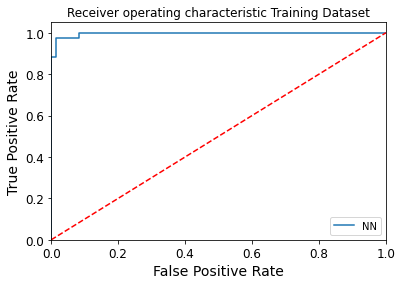

AUC: 0.997


ROC AUC Curve for Model: 1


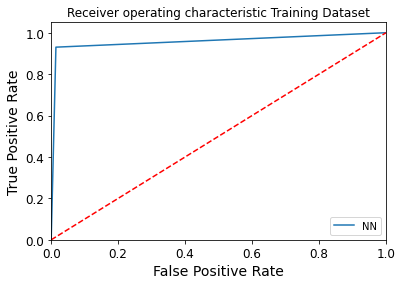

AUC: 0.958


ROC AUC Curve for Model: 2


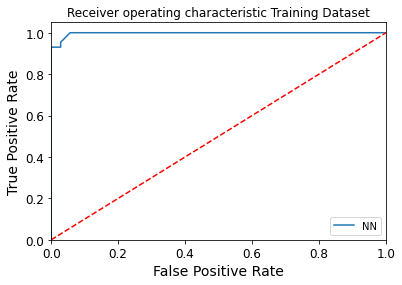

AUC: 0.997


ROC AUC Curve for Model: 3


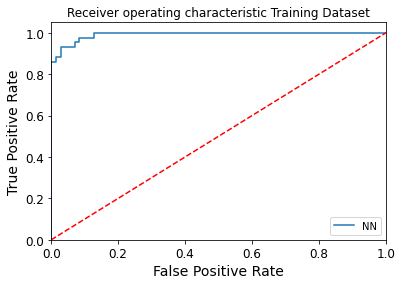

AUC: 0.992




In [37]:
for i in range(len(model)):
    print(f"ROC AUC Curve for Model: {i}")
    
    NN_roc_auc = roc_auc_score(y_test, model[i].predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model[i].predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='NN' % NN_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Training Dataset')
    plt.legend(loc="lower right")
    plt.savefig('RF_ROC')
    plt.show()

    # calculate AUC

    print('AUC: %.3f' % metrics.auc(fpr, tpr))
    print()
    print()

In [39]:
data2= data.drop(['id','diagnosis'],axis=1)
data2['diagnosis'] = data.diagnosis.astype(str)
Y102= data.target_values

In [40]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
tree_model = DecisionTreeClassifier(random_state=42,criterion='entropy')
tree_model1 = tree_model.fit(X, Y102)

In [41]:
text_representation = tree.export_text(tree_model)
print(text_representation)

|--- feature_20 <= 16.80
|   |--- feature_7 <= 0.05
|   |   |--- feature_13 <= 48.70
|   |   |   |--- feature_1 <= 21.57
|   |   |   |   |--- class: benign
|   |   |   |--- feature_1 >  21.57
|   |   |   |   |--- feature_20 <= 14.43
|   |   |   |   |   |--- class: benign
|   |   |   |   |--- feature_20 >  14.43
|   |   |   |   |   |--- feature_0 <= 13.45
|   |   |   |   |   |   |--- feature_11 <= 1.87
|   |   |   |   |   |   |   |--- class: malignant
|   |   |   |   |   |   |--- feature_11 >  1.87
|   |   |   |   |   |   |   |--- class: benign
|   |   |   |   |   |--- feature_0 >  13.45
|   |   |   |   |   |   |--- class: benign
|   |   |--- feature_13 >  48.70
|   |   |   |--- feature_5 <= 0.06
|   |   |   |   |--- class: malignant
|   |   |   |--- feature_5 >  0.06
|   |   |   |   |--- class: benign
|   |--- feature_7 >  0.05
|   |   |--- feature_1 <= 20.30
|   |   |   |--- feature_12 <= 2.58
|   |   |   |   |--- feature_15 <= 0.02
|   |   |   |   |   |--- class: benign
|   |   |   |

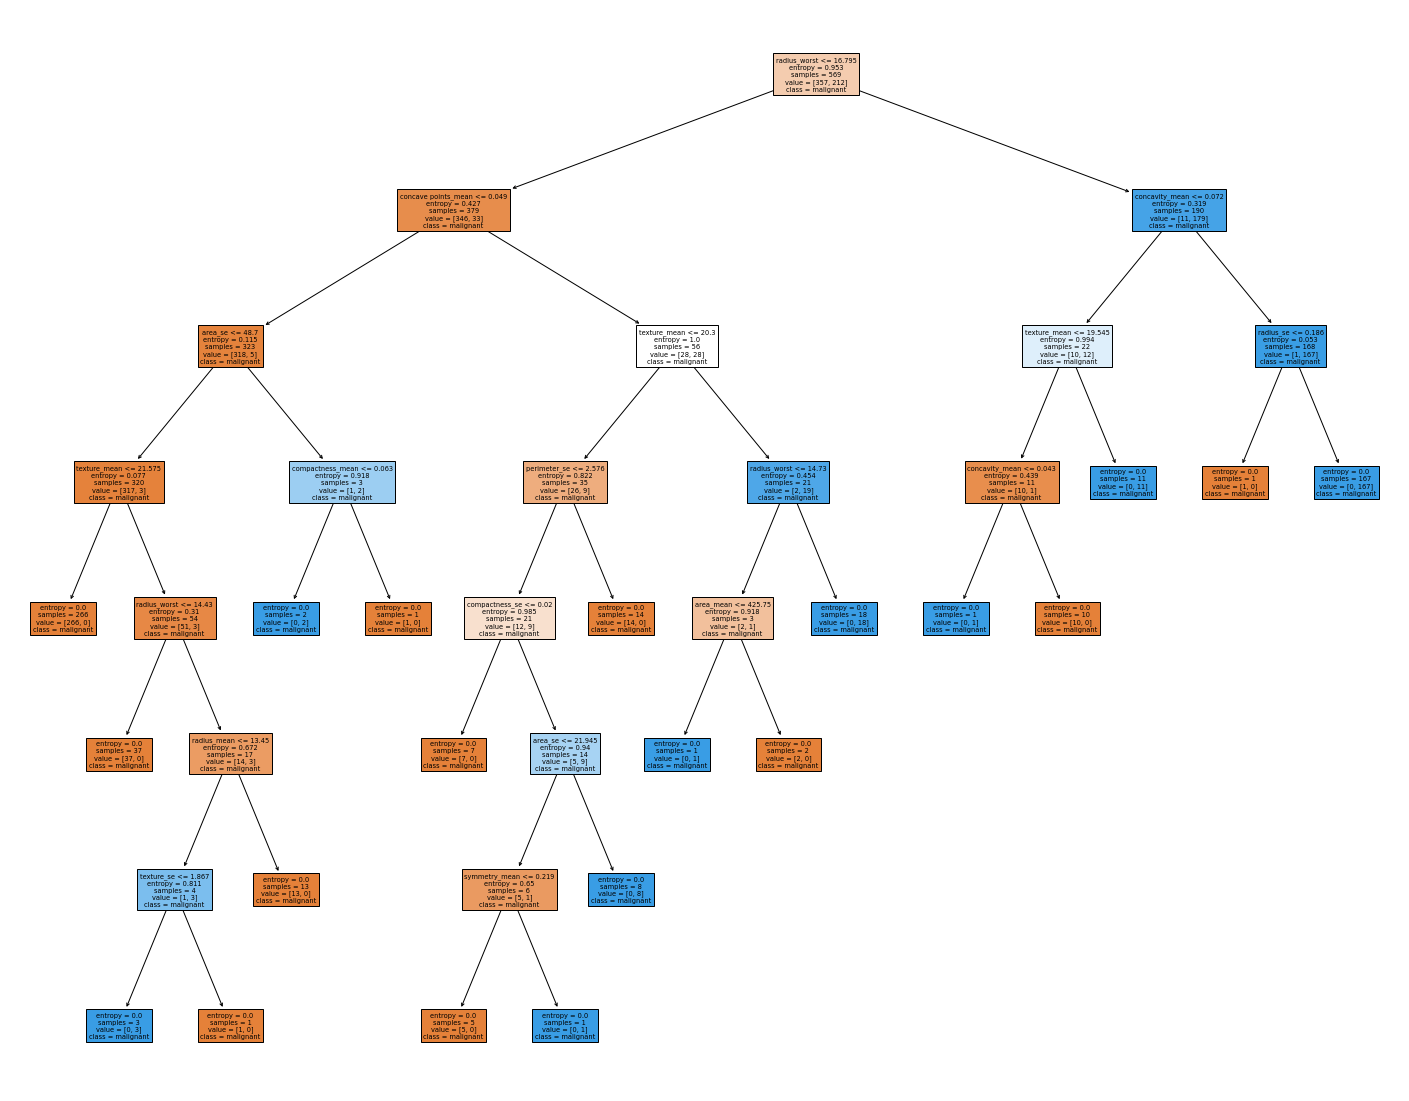

In [42]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model, 
                   feature_names=data2.columns,  
                   class_names=data.target_values,
                   filled=True)

In [ ]:
## Kaggle cannot run this part, works fine in Anaconda

# # This may not the best way to view each estimator as visualization would be messy and small for 21 columns.
# ## Visualizing using 10 columns

# from sklearn.ensemble import RandomForestClassifier
# forest=RandomForestClassifier(n_estimators=5,criterion='entropy',random_state=42)
# forest.fit(X_train,y_train)

# fn=data2.columns
# cn=data.target_values

# fig, axes = plt.subplots(nrows = 1,ncols = 10,figsize = (20,20), dpi=900)
# for index in range(0, 9):
#     tree.plot_tree(forest.estimators_[index],
#                    feature_names = fn, 
#                    class_names=cn,
#                    filled = True,
#                    ax = axes[index]);

#     axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig('rf_5trees.png')



## K-Means

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [44]:
## Splitting data
data_drop = data.drop(['id','diagnosis','target_values'],axis=1)
X1 = data_drop.values
Y1 =data["diagnosis"].values

from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1= train_test_split(X1,Y1, test_size=0.25, random_state=42)
X2 = data_drop.values
Y2 =data["diagnosis"].values

X_test1=sc.fit_transform(X_test1)
X_train1 = sc.fit_transform(X_train1)

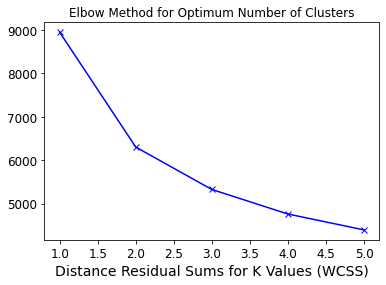

In [45]:
# Elbow
kmeans = KMeans()
ssd = []
K = range(1, 6)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(X_train1)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Distance Residual Sums for K Values (WCSS)")
plt.title("Elbow Method for Optimum Number of Clusters")
plt.show()

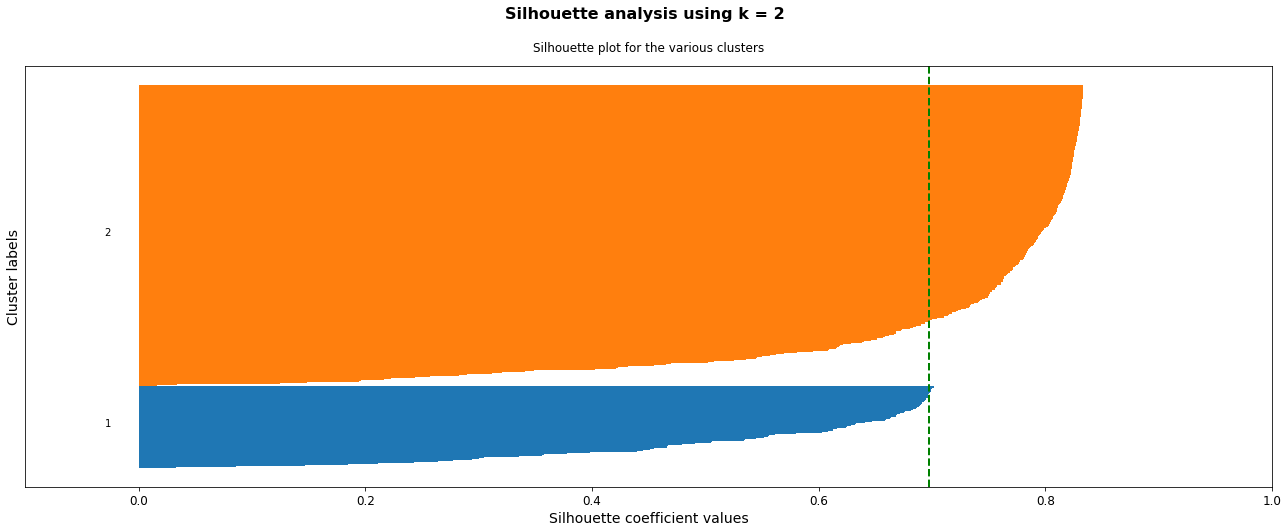

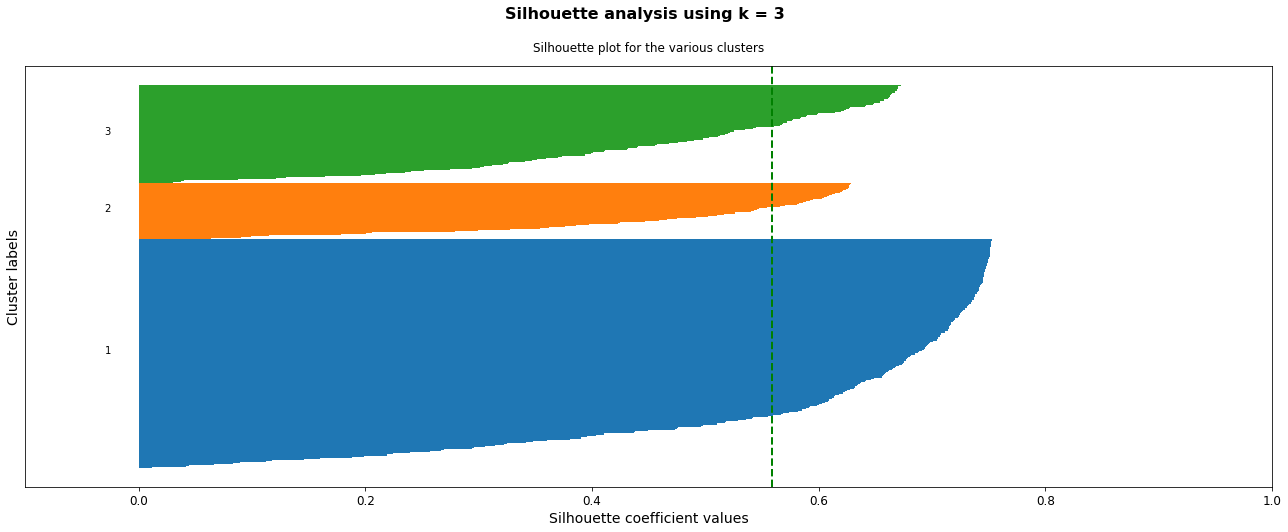

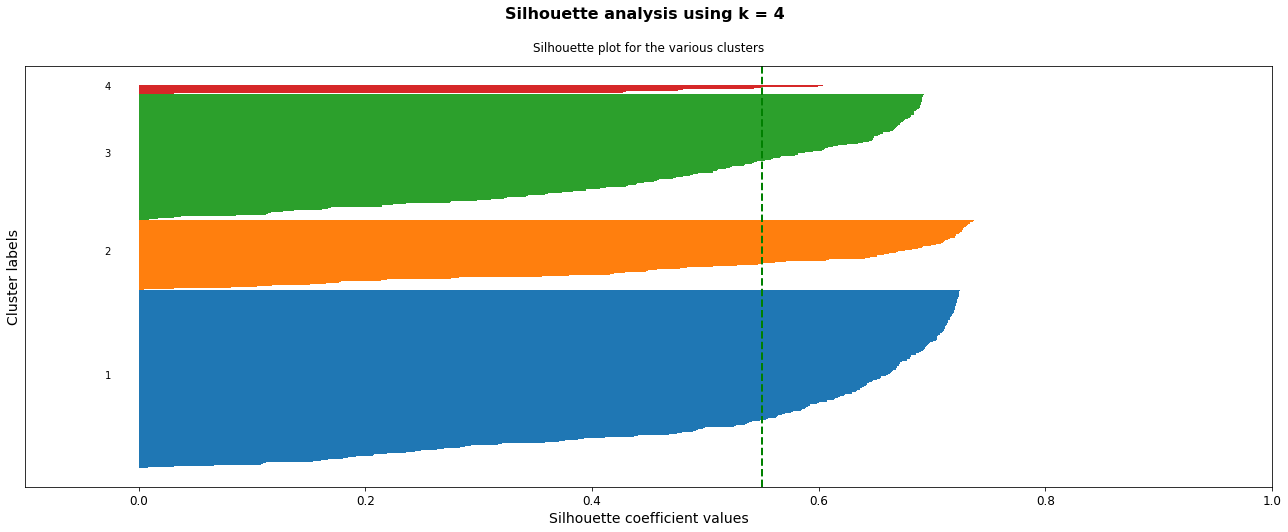

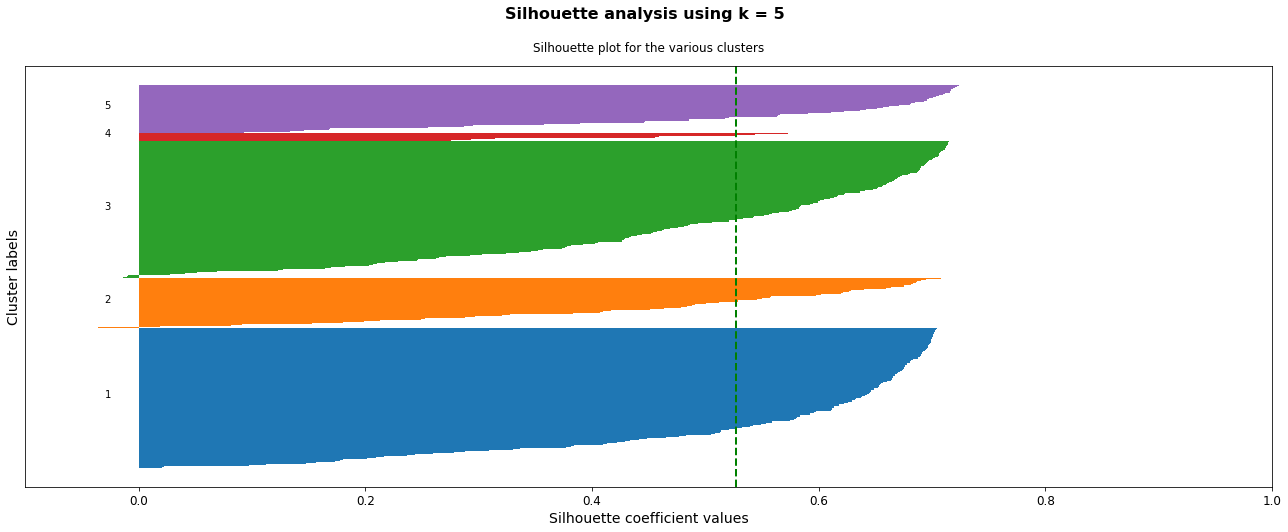

In [46]:
## silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([2, 3, 4,5]):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X1)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X1, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

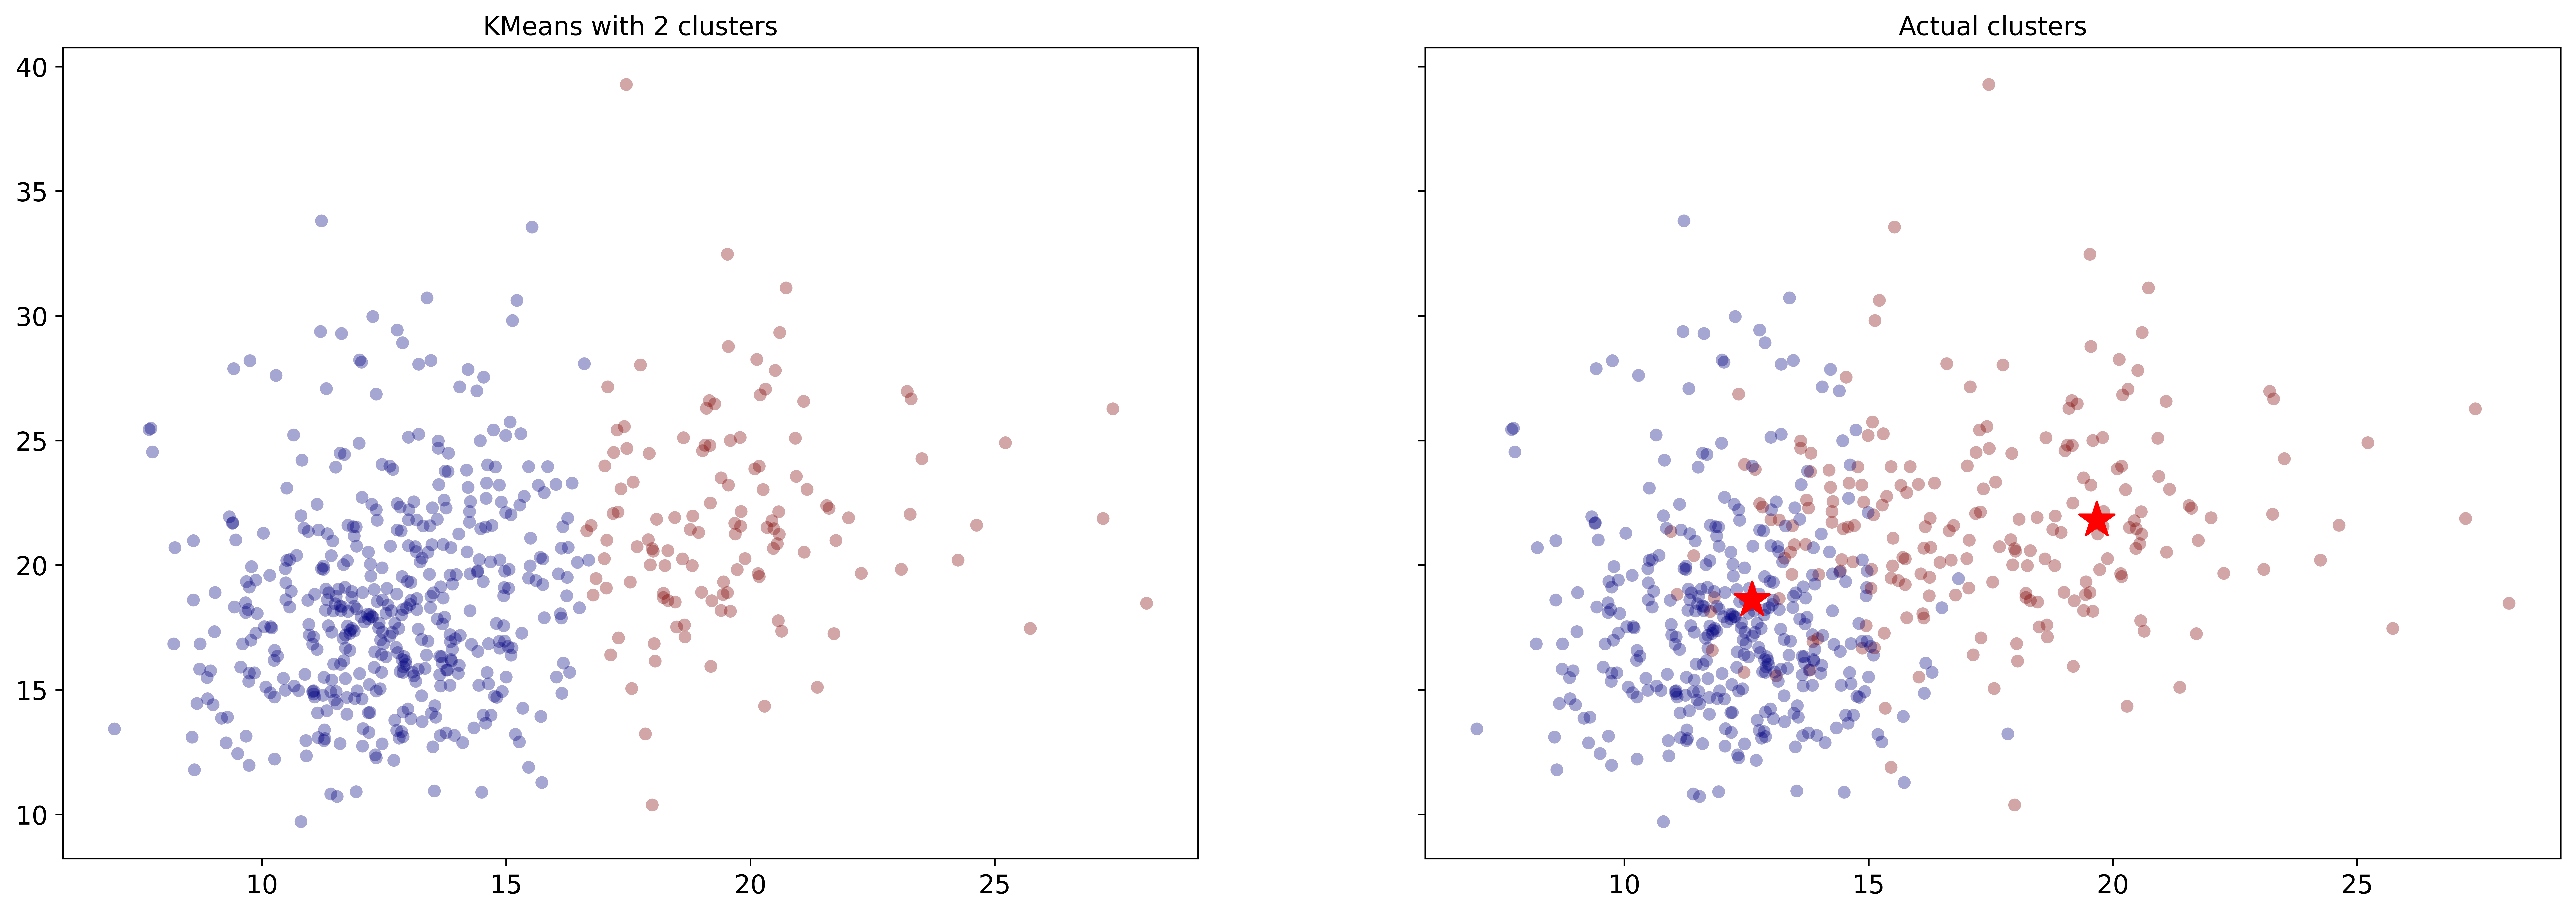

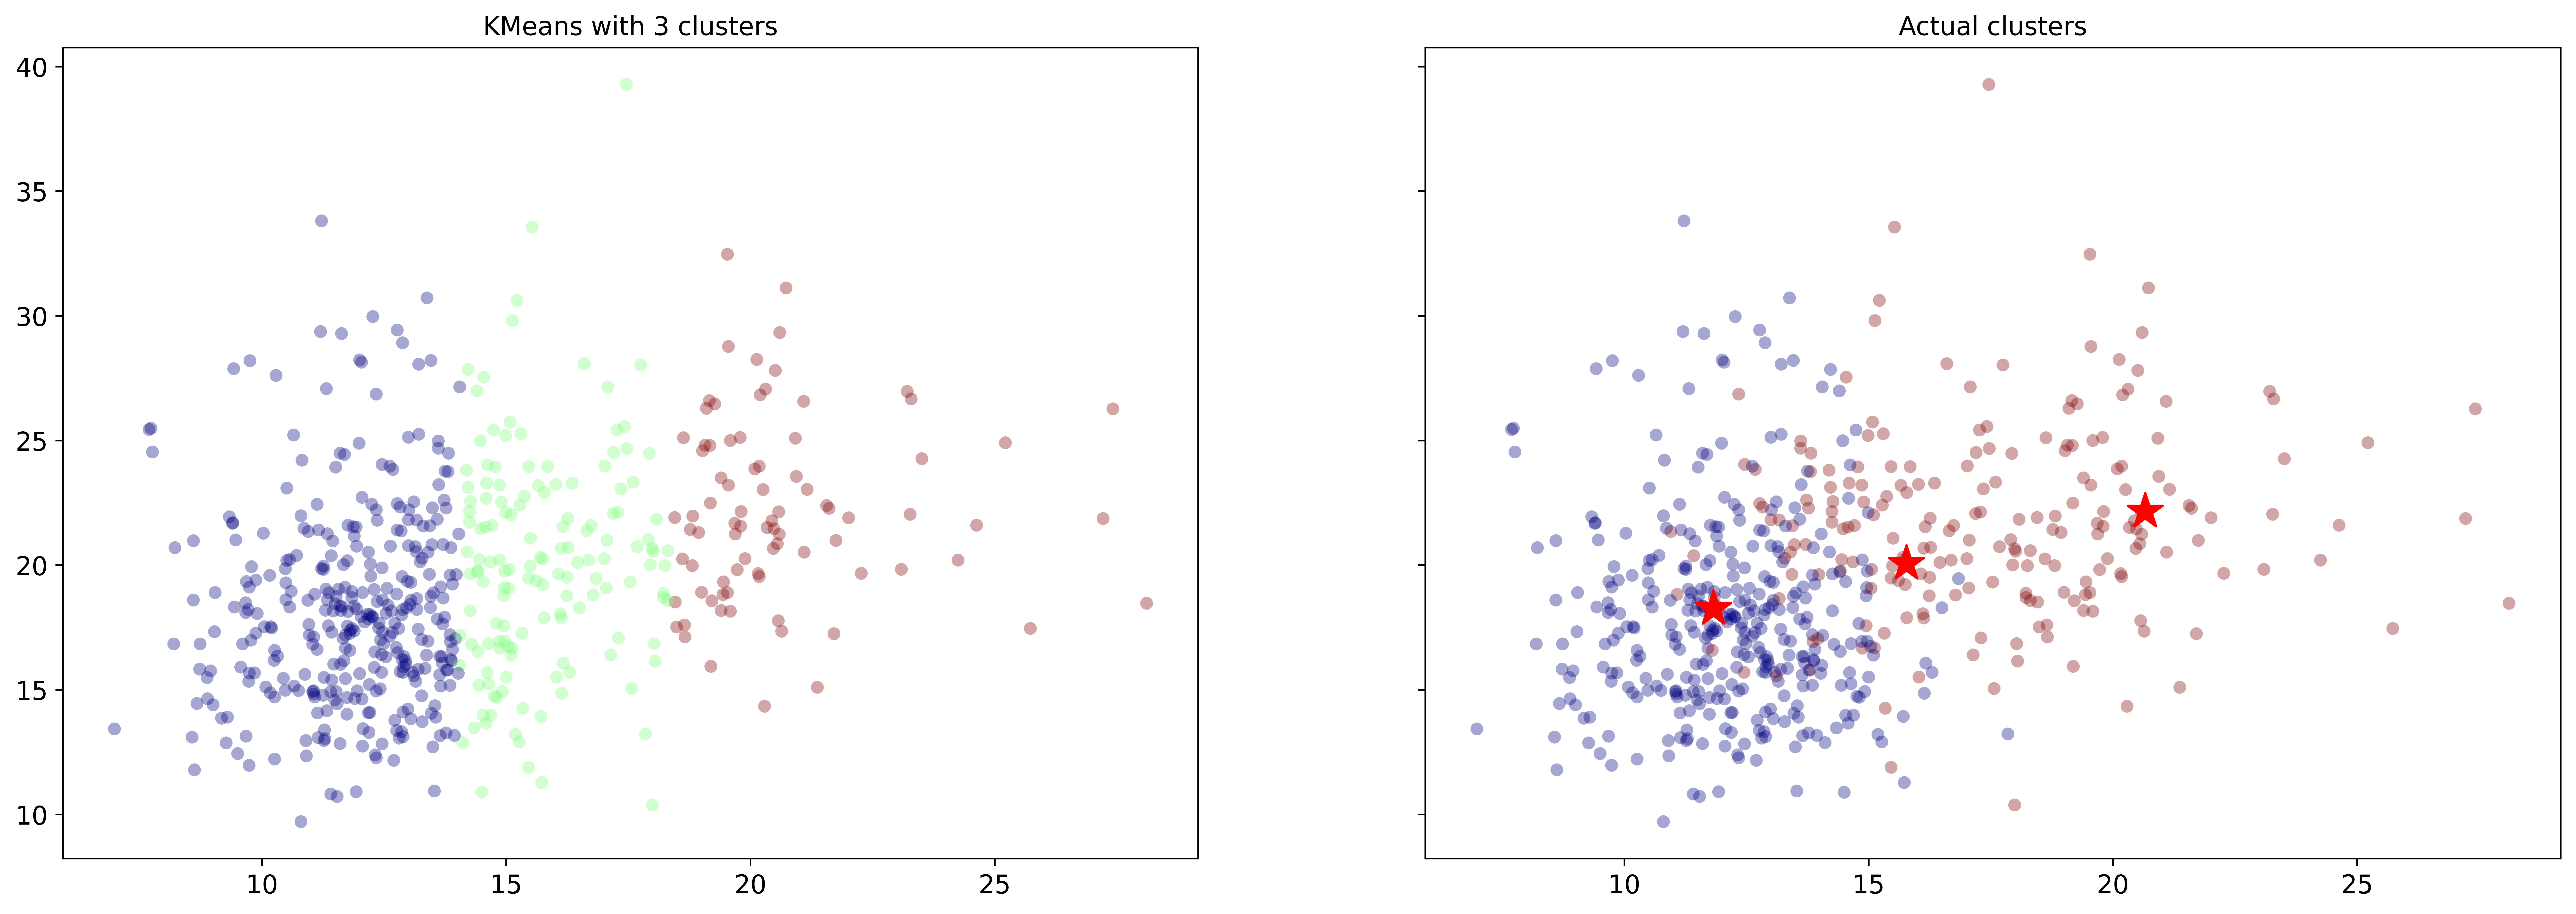

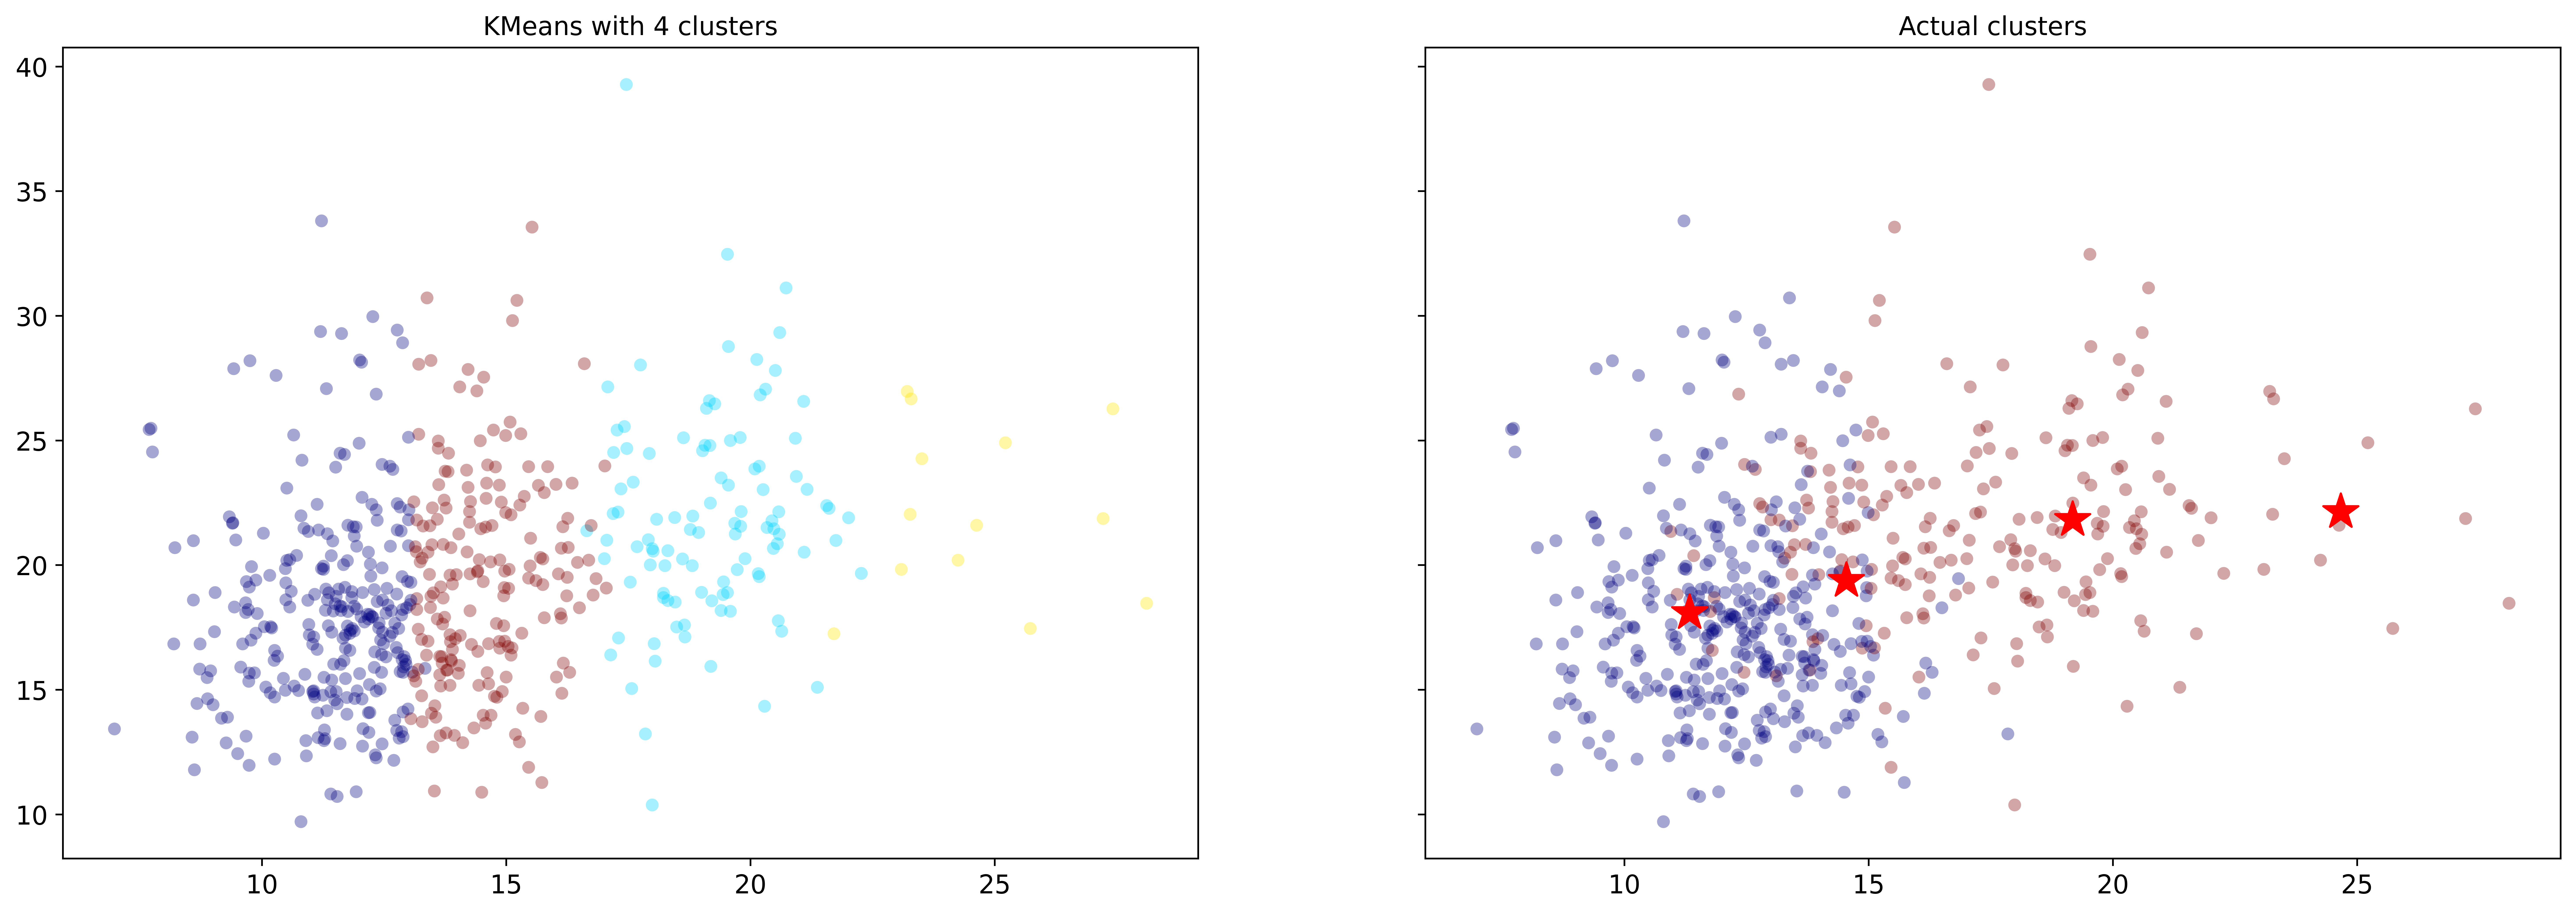

In [49]:
# KMeans for 2,3 & 4 Clusters
for i in range(2,5):
    kmns = KMeans(n_clusters=i, init='k-means++', n_init=40, max_iter=100, tol=0.0001, verbose=0, random_state=42, copy_x=True, algorithm='auto')
    kY = kmns.fit_predict(X1)
    centroids = kmns.cluster_centers_

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(21,7), dpi=900)

    ax1.scatter(X1[:,0],X1[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
    ax1.set_title(f'KMeans with {i} clusters')

    ax2.scatter(X1[:,0],X1[:,1],  c = data['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
                c='r', label='centroid')
    ax2.set_title('Actual clusters');

## Building Neural Network Using Keras and Sklearn

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
## Building Model
### number of dimention = 21 since shape of X is 21

classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 21, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

2022-06-20 08:05:01.709243: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [55]:
hidden1=classifier.layers[1]
hidden1.name

## getting weights and biases
weights, biases = hidden1.get_weights()

In [57]:
# weights
#print(weights)
print("Weight Shape: ",weights.shape,"\n")
print("Biases: ", biases, "\n")
print("Biases Shape: ",biases.shape)

Weight Shape:  (21, 10) 

Biases:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

Biases Shape:  (10,)


In [58]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 21)                462       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


##### Compiling Network, early stopping and fitting data to the model

In [62]:
## Compiling Neural Network

classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


## early stopping. This callback will stop the training when there is no improvement in the loss for 5 consecutive epoch
callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)



##Fitting the data

history = classifier.fit(X_train, y_train, epochs=300,
                   validation_split=.20, verbose=1, callbacks=callback)

Epoch 1/300
12/12 [==============================] - 1s 24ms/step - loss: 0.0629 - accuracy: 0.9808 - val_loss: 0.0940 - val_accuracy: 0.9560
Epoch 2/300
12/12 [==============================] - 0s 5ms/step - loss: 0.0594 - accuracy: 0.9808 - val_loss: 0.0947 - val_accuracy: 0.9560
Epoch 3/300
12/12 [==============================] - 0s 5ms/step - loss: 0.0574 - accuracy: 0.9863 - val_loss: 0.0959 - val_accuracy: 0.9560
Epoch 4/300
12/12 [==============================] - 0s 5ms/step - loss: 0.0569 - accuracy: 0.9863 - val_loss: 0.0959 - val_accuracy: 0.9560
Epoch 5/300
12/12 [==============================] - 0s 5ms/step - loss: 0.0564 - accuracy: 0.9808 - val_loss: 0.0956 - val_accuracy: 0.9560
Epoch 6/300
12/12 [==============================] - 0s 5ms/step - loss: 0.0550 - accuracy: 0.9863 - val_loss: 0.0969 - val_accuracy: 0.9451
Epoch 00006: early stopping


In [67]:
loss, accuracy = classifier.evaluate(X_test, y_test)

print("Loss :",loss,"  Accuracy :", accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9737
Loss : 0.07250718027353287   Accuracy : 0.9736841917037964


## Plot Model History

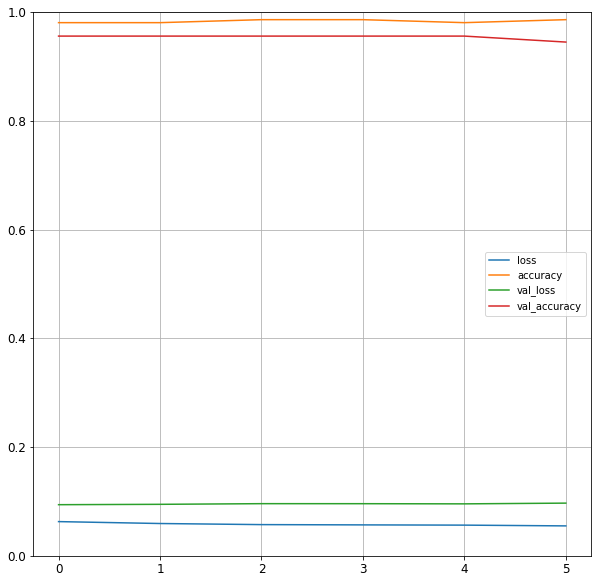

In [75]:
## Visualize
from tensorflow.keras.utils import plot_model

pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


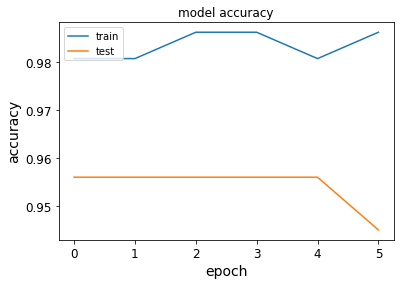

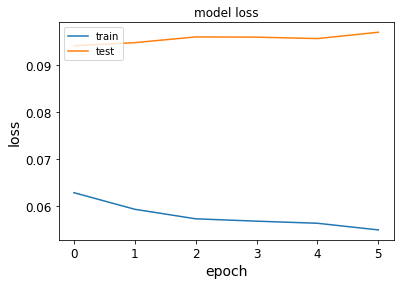

In [76]:
## Visualize loss and accuracy seperatley

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
### Saving/Loading the model
# from keras.models import load_model

classifier.save('breast_cancer_model.h5') #Save trained ANN

##To Load trained ANN

#classifier = load_model('breast_cancer_model.h5') 

## Confusion Matrix

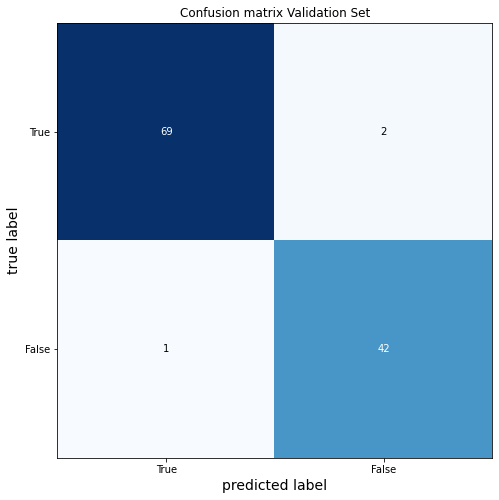



Classification Report on Testing Dataset:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



4/4 [==============================] - 0s 3ms/step - loss: 0.0725 - accuracy: 0.9737


Model Loss:  0.0725


Model Accuracy:  0.9737




In [81]:

### For Test Dataset

### We'll assign the results true or false based on their probabilities 
## (if probability >= 0.5 than true else false)

y_pred1 = classifier.predict(X_test)
y_pred1 = [ 1 if y>=0.5 else 0 for y in y_pred1 ]
cm = confusion_matrix(y_test, y_pred1)


## Plot Matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(8,8))
plt.title('Confusion matrix Validation Set')
plt.xticks(range(2), ['True','False'], fontsize=10)
plt.yticks(range(2), ['True','False'], fontsize=10)
plt.show()

print()
print()
print("Classification Report on Testing Dataset:")
print(classification_report(y_test, y_pred1))
print()
print()
loss1,accu1=classifier.evaluate(X_test,y_test, verbose=1)
print()
print()
print("Model Loss: ",round(loss1,4))
print()
print()
print("Model Accuracy: ", round(accu1,4))
print()
print()


# The End